IMPORTING LIBRARIES

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

IMPORTING DATASET

In [9]:
train_df=pd.read_csv("/content/Poem_classification - train_data.csv")
train_df

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...
...,...,...
836,Environment,Why make so much of fragmentary blue In here a...
837,Environment,"Woman, I wish I didn't know your name. What co..."
838,Environment,"Yonder to the kiosk, beside the creek, Paddle ..."
839,Environment,You come to fetch me from my work to-night Whe...


In [10]:
test_df=pd.read_csv("/content/Poem_classification - test_data.csv")
test_df

,Genre,Poem
0,Music,A woman walks by the bench I’m sitting onwith ...
1,Music,"Because I am a boy, the untouchability of beau..."
2,Music,"Because today we did not leave this world,We n..."
3,Music,"Big Bend has been here, been here. Shouldn’t i..."
4,Music,"I put shells there, along the lip of the road...."
...,...,...
145,Environment,"To pick a tulip from the garden, the red one. ..."
146,Environment,We are as clouds that veil the midnight moon; ...
147,Environment,"When pulled, the spider web took another form...."
148,Environment,Whose woods these are I think I know. His hous...


In [11]:
df=pd.concat([train_df,test_df],axis=0,ignore_index=True)
df

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...
...,...,...
986,Environment,"To pick a tulip from the garden, the red one. ..."
987,Environment,We are as clouds that veil the midnight moon; ...
988,Environment,"When pulled, the spider web took another form...."
989,Environment,Whose woods these are I think I know. His hous...


DATA EXPLORATION

In [12]:
df.shape

(991, 2)

In [13]:
df.head()

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...


In [14]:
df.tail()

,Genre,Poem
986,Environment,"To pick a tulip from the garden, the red one. ..."
987,Environment,We are as clouds that veil the midnight moon; ...
988,Environment,"When pulled, the spider web took another form...."
989,Environment,Whose woods these are I think I know. His hous...
990,Environment,you can make the maples blazejust by stopping ...


In [15]:
df.columns

Index(['Genre', 'Poem'], dtype='object')

In [16]:
df.dtypes

Genre    object
Poem     object
dtype: object

DATA WRANGLING

In [17]:
# MISSING VALUES
df.isna().sum()

Genre    0
Poem     4
dtype: int64

In [18]:
# REMOVE THE MISSING VALUES
df.dropna(axis=0,inplace=True)
df

,Genre,Poem
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...
5,Music,"for Bob Marley, Bavaria, November 1980 Here i..."
...,...,...
986,Environment,"To pick a tulip from the garden, the red one. ..."
987,Environment,We are as clouds that veil the midnight moon; ...
988,Environment,"When pulled, the spider web took another form...."
989,Environment,Whose woods these are I think I know. His hous...


In [19]:
# CHECK FOR DUPLICATES
df.duplicated().sum()

3

In [20]:
# DROP DUPLICATES
df.drop_duplicates(inplace=True)
df

,Genre,Poem
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...
5,Music,"for Bob Marley, Bavaria, November 1980 Here i..."
...,...,...
986,Environment,"To pick a tulip from the garden, the red one. ..."
987,Environment,We are as clouds that veil the midnight moon; ...
988,Environment,"When pulled, the spider web took another form...."
989,Environment,Whose woods these are I think I know. His hous...


In [21]:
# RESET THE INDEX VALUES
df.reset_index(drop=True,inplace=True)
df

,Genre,Poem
0,Music,In the thick brushthey spend the...
1,Music,Storms are generous. ...
2,Music,—After Ana Mendieta Did you carry around the ...
3,Music,for Aja Sherrard at 20The portent may itself ...
4,Music,"for Bob Marley, Bavaria, November 1980 Here i..."
...,...,...
979,Environment,"To pick a tulip from the garden, the red one. ..."
980,Environment,We are as clouds that veil the midnight moon; ...
981,Environment,"When pulled, the spider web took another form...."
982,Environment,Whose woods these are I think I know. His hous...


DATA ANALYSIS

In [22]:
# OBSERVING OUTPUT LABEL
df['Genre'].value_counts()

Environment    252
Music          250
Death          241
Affection      241
Name: Genre, dtype: int64

<Axes: xlabel='Genre', ylabel='count'>

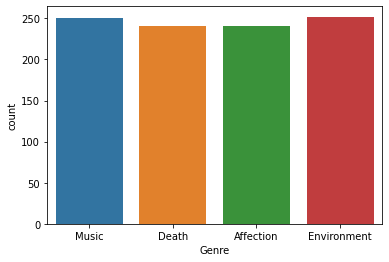

In [23]:
sns.countplot(x='Genre',data=df)     # 

DOWNLOADING PACKAGES FOR NLP

In [24]:
import nltk
nltk.download('stopwords')   #to get all stop words
nltk.download('wordnet')     #for lemmatization
nltk.download('punkt')       #for tokenization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

NLP PREPROCESSING

In [25]:
# ASSIGNMENT THE TEXT COLUMN TO AN OBJECT
poem=df.Poem
poem

0                    In the thick brushthey spend the...
1         Storms are generous.                       ...
2       —After Ana Mendieta Did you carry around the ...
3       for Aja Sherrard at 20The portent may itself ...
4       for Bob Marley, Bavaria, November 1980 Here i...
                             ...                        
979    To pick a tulip from the garden, the red one. ...
980    We are as clouds that veil the midnight moon; ...
981    When pulled, the spider web took another form....
982    Whose woods these are I think I know. His hous...
983    you can make the maples blazejust by stopping ...
Name: Poem, Length: 984, dtype: object

In [26]:
# TOKENIZATION
from nltk import TweetTokenizer
tk=TweetTokenizer()
poem=poem.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
poem

0      In the thick brushthey spend the hottest part ...
1      Storms are generous . Something so easy to sur...
2      — After Ana Mendieta Did you carry around the ...
3      for Aja Sherrard at 20The portent may itself b...
4      for Bob Marley , Bavaria , November 1980 Here ...
                             ...                        
979    To pick a tulip from the garden , the red one ...
980    We are as clouds that veil the midnight moon ;...
981    When pulled , the spider web took another form...
982    Whose woods these are I think I know . His hou...
983    you can make the maples blazejust by stopping ...
Name: Poem, Length: 984, dtype: object

In [27]:
# REMOVING SPECIAL CHARACTERS FROM THE TOKENS
import re
poem=poem.str.replace('[^a-zA-Z0-9]+',' ')
poem

0      In the thick brushthey spend the hottest part ...
1      Storms are generous Something so easy to surre...
2       After Ana Mendieta Did you carry around the m...
3      for Aja Sherrard at 20The portent may itself b...
4      for Bob Marley Bavaria November 1980 Here is t...
                             ...                        
979    To pick a tulip from the garden the red one To...
980    We are as clouds that veil the midnight moon H...
981    When pulled the spider web took another form T...
982    Whose woods these are I think I know His house...
983    you can make the maples blazejust by stopping ...
Name: Poem, Length: 984, dtype: object

In [28]:
# TOKENIZE WORDS WITH LENGTH MORE THAN 3 (a,in etc removed)
from nltk import word_tokenize
poem=poem.apply(lambda x:' '.join(w for w in word_tokenize(x) if len(w)>=3))
poem

0      the thick brushthey spend the hottest part the...
1      Storms are generous Something easy surrender s...
2      After Ana Mendieta Did you carry around the ma...
3      for Aja Sherrard 20The portent may itself memo...
4      for Bob Marley Bavaria November 1980 Here the ...
                             ...                        
979    pick tulip from the garden the red one put the...
980    are clouds that veil the midnight moon How res...
981    When pulled the spider web took another form T...
982    Whose woods these are think know His house the...
983    you can make the maples blazejust stopping loo...
Name: Poem, Length: 984, dtype: object

In [29]:
# LEMMETIZATION USING SNOWBALL STEMMER AND CONVERTING WORDS TO LOWER CASE
from nltk import SnowballStemmer
snow=SnowballStemmer('english')
poem=poem.apply(lambda x:[snow.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
poem

0      the thick brushthey spend the hottest part the...
1      storm are generous someth easi surrend sit the...
2      after ana mendieta did you carri around the ma...
3      for aja sherrard 20the portent may itself memo...
4      for bob marley bavaria novemb 1980 here the br...
                             ...                        
979    pick tulip from the garden the red one put the...
980    are cloud that veil the midnight moon how rest...
981    when pull the spider web took anoth form the b...
982    whose wood these are think know his hous the v...
983    you can make the mapl blazejust stop look you ...
Name: Poem, Length: 984, dtype: object

In [30]:
# REMOVING STOPWORDS
from nltk.corpus import stopwords
stop=stopwords.words('english')
poem=poem.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:" ".join(x))
poem

0      thick brushthey spend hottest part day soak ho...
1      storm generous someth easi surrend sit window ...
2      ana mendieta carri around matin star hold fore...
3      aja sherrard 20the portent may memori wallac s...
4      bob marley bavaria novemb 1980 brilliant morn ...
                             ...                        
979    pick tulip garden red one put desk small blue ...
980    cloud veil midnight moon restless speed gleam ...
981    pull spider web took anoth form bull eye relax...
982             whose wood think know hous villag though
983    make mapl blazejust stop look set clock barkso...
Name: Poem, Length: 984, dtype: object

In [31]:
# VECTORIZATION BY TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(poem)
train_data

<984x7107 sparse matrix of type '<class 'numpy.float64'>'
	with 24103 stored elements in Compressed Sparse Row format>

In [32]:
print(train_data)

  (0, 4220)	0.30146785245762203
  (0, 539)	0.30146785245762203
  (0, 2938)	0.30146785245762203
  (0, 4827)	0.28448961932519834
  (0, 6784)	0.15975167083525493
  (0, 3975)	0.19570681681046495
  (0, 6417)	0.2554651380781227
  (0, 2971)	0.30146785245762203
  (0, 5577)	0.2630995752575813
  (0, 1557)	0.13765785431631364
  (0, 4370)	0.21439440871639504
  (0, 2986)	0.28448961932519834
  (0, 5679)	0.2630995752575813
  (0, 834)	0.30146785245762203
  (0, 6184)	0.22644065683104703
  (1, 716)	0.35210110842881304
  (1, 2503)	0.27209369845069353
  (1, 5796)	0.28557634665273696
  (1, 6920)	0.24869303114218172
  (1, 5461)	0.27980021531629556
  (1, 5995)	0.3921048134178728
  (1, 1894)	0.32261975421270095
  (1, 5611)	0.27711539882459263
  (1, 2529)	0.3921048134178728
  (1, 5846)	0.3032008826248073
  :	:
  (982, 3352)	0.3046024553468519
  (983, 617)	0.2386634288829473
  (983, 469)	0.2386634288829473
  (983, 5360)	0.2386634288829473
  (983, 3191)	0.2386634288829473
  (983, 2643)	0.2386634288829473
  (983,

In [33]:
x=train_data

In [34]:
# ASSIGN VALUES TO THE OUTPUT LABEL USINGING MAP FUNCTION
df['Genre']=df['Genre'].map({'Environment':1,'Music':2,'Death':3,'Affection':4})

In [35]:
y=df['Genre'].values
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

TRAIN-TEST SPLIT

In [36]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

MODEL CREATION AND PERFROMACE EVALUATION

In [37]:
# CLASSIFICATION MODEL
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay

KNN CLASSIFIER
CONFUSION MATRIX:
 [[42  6  7 14]
 [25 21 12 11]
 [33 18 14 17]
 [19 20 17 20]]
ACCURACY SCORE: 0.3277027027027027
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           1       0.35      0.61      0.45        69
           2       0.32      0.30      0.31        69
           3       0.28      0.17      0.21        82
           4       0.32      0.26      0.29        76

    accuracy                           0.33       296
   macro avg       0.32      0.34      0.32       296
weighted avg       0.32      0.33      0.31       296



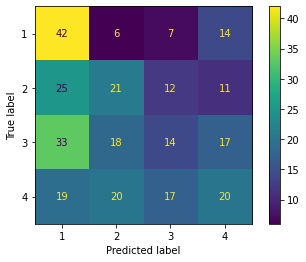

In [39]:
print("KNN CLASSIFIER")
model_knn=KNeighborsClassifier()
model_knn.fit(x_train,y_train)
y_knn=model_knn.predict(x_test)
print("CONFUSION MATRIX:\n",confusion_matrix(y_test,y_knn))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_knn))
print("ACCURACY SCORE:",accuracy_score(y_test,y_knn))
print("CLASSIFICATION REPORT:\n",classification_report(y_test,y_knn))

NAIVE-BAYES
CONFUSION MATRIX:
 [[53  8  0  8]
 [27 29  7  6]
 [28 28 10 16]
 [33 17  6 20]]
ACCURACY SCORE: 0.3783783783783784
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           1       0.38      0.77      0.50        69
           2       0.35      0.42      0.38        69
           3       0.43      0.12      0.19        82
           4       0.40      0.26      0.32        76

    accuracy                           0.38       296
   macro avg       0.39      0.39      0.35       296
weighted avg       0.39      0.38      0.34       296



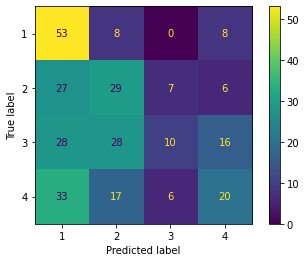

In [40]:
print("NAIVE-BAYES")
model_nb=MultinomialNB()
model_nb.fit(x_train,y_train)
y_nb=model_nb.predict(x_test)
print("CONFUSION MATRIX:\n",confusion_matrix(y_test,y_nb))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_nb))
print("ACCURACY SCORE:",accuracy_score(y_test,y_nb))
print("CLASSIFICATION REPORT:\n",classification_report(y_test,y_nb))

DECISION TREE
CONFUSION MATRIX:
 [[35 15 10  9]
 [19 24 12 14]
 [17 26 29 10]
 [18 22 17 19]]
ACCURACY SCORE: 0.3614864864864865
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           1       0.39      0.51      0.44        69
           2       0.28      0.35      0.31        69
           3       0.43      0.35      0.39        82
           4       0.37      0.25      0.30        76

    accuracy                           0.36       296
   macro avg       0.37      0.36      0.36       296
weighted avg       0.37      0.36      0.36       296



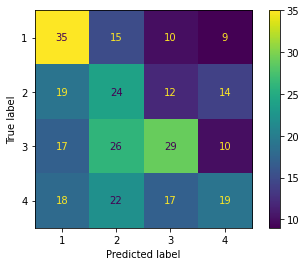

In [41]:
print("DECISION TREE")
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
y_dt=model_dt.predict(x_test)
print("CONFUSION MATRIX:\n",confusion_matrix(y_test,y_dt))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_dt))
print("ACCURACY SCORE:",accuracy_score(y_test,y_dt))
print("CLASSIFICATION REPORT:\n",classification_report(y_test,y_dt))

SUPPORT VECTOR
CONFUSION MATRIX:
 [[54 14  0  1]
 [21 42  3  3]
 [20 47  7  8]
 [26 29  6 15]]
ACCURACY SCORE: 0.39864864864864863
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           1       0.45      0.78      0.57        69
           2       0.32      0.61      0.42        69
           3       0.44      0.09      0.14        82
           4       0.56      0.20      0.29        76

    accuracy                           0.40       296
   macro avg       0.44      0.42      0.36       296
weighted avg       0.44      0.40      0.34       296



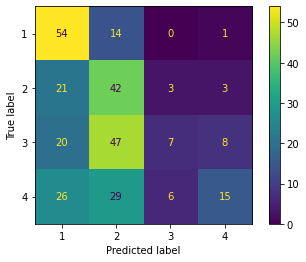

In [42]:
print("SUPPORT VECTOR")
model_svm=SVC()
model_svm.fit(x_train,y_train)
y_svm=model_svm.predict(x_test)
print("CONFUSION MATRIX:\n",confusion_matrix(y_test,y_svm))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_svm))
print("ACCURACY SCORE:",accuracy_score(y_test,y_svm))
print("CLASSIFICATION REPORT:\n",classification_report(y_test,y_svm))

RANDOM FOREST
CONFUSION MATRIX:
 [[32 26  2  9]
 [13 41  8  7]
 [12 42 16 12]
 [12 26 11 27]]
ACCURACY SCORE: 0.3918918918918919
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           1       0.46      0.46      0.46        69
           2       0.30      0.59      0.40        69
           3       0.43      0.20      0.27        82
           4       0.49      0.36      0.41        76

    accuracy                           0.39       296
   macro avg       0.42      0.40      0.39       296
weighted avg       0.42      0.39      0.38       296



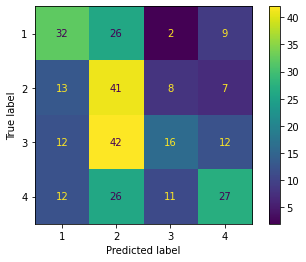

In [43]:
print("RANDOM FOREST")
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)
y_rf=model_rf.predict(x_test)
print("CONFUSION MATRIX:\n",confusion_matrix(y_test,y_rf))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_rf))
print("ACCURACY SCORE:",accuracy_score(y_test,y_rf))
print("CLASSIFICATION REPORT:\n",classification_report(y_test,y_rf))

In [44]:
# COMPARING THE ACCURACY SCORES OF ALL THE CLASSIFIERS
lst=[model_knn,model_nb,model_svm,model_dt,model_rf]
model=['KNN','NB','SVM','DECISION TREE','RANDOM FOREST']
lst_acc=[]
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  lst_acc.append(accuracy_score(y_test,y_pred))

acc_df=pd.DataFrame({'ALGORITHM':model,'ACCURACY_SCORE':lst_acc})
acc_df.sort_values(by='ACCURACY_SCORE',ascending=False,inplace=True)
acc_df

,ALGORITHM,ACCURACY_SCORE
2,SVM,0.398649
4,RANDOM FOREST,0.385135
1,NB,0.378378
3,DECISION TREE,0.337838
0,KNN,0.327703


<Axes: xlabel='ALGORITHM', ylabel='ACCURACY_SCORE'>

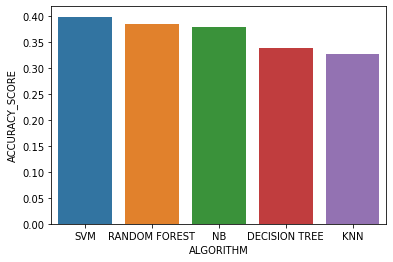

In [45]:
sns.barplot(x='ALGORITHM',y='ACCURACY_SCORE',data=acc_df)

CONCLUSION: SVM AND RANDOM FOREST GIVES HIGHEST ACCURACY

In [46]:
# PERFORMING HYPERPARAMATER TUNING ON SVM TO IMPROVE ACCURACY
from sklearn.model_selection import GridSearchCV
cls1=SVC()

In [52]:
params={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001],'kernel':['rfb','linear','poly']}
clf=GridSearchCV(cls1,params,cv=10,scoring='accuracy')
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001],
                         'kernel': ['rfb', 'linear', 'poly']},
             scoring='accuracy')

In [53]:
print(clf.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [54]:
print(clf.best_estimator_)

SVC(C=1, gamma=1, kernel='linear')


In [55]:
svm_best=SVC(C=1,gamma=1,kernel='linear')
svm_best.fit(x_train,y_train)
y_best=svm_best.predict(x_test)

In [56]:
new_accuracy=accuracy_score(y_test,y_best)
print(new_accuracy)

0.42905405405405406


CONCLUSION: THE ACCURACY OF THE MODEL IS IMPROVED BY USING HYPER-PARAMETER TUNING